<a href="https://colab.research.google.com/github/Francho03/AI-Project/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [ ]:
test = pd.read_csv('test.csv')
test.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2059,2059,119633,Female,disloyal Customer,43,Business travel,Business,1727,2,1,...,5,5,5,4,5,5,5,17,47.0,neutral or dissatisfied
1923,1923,105512,Female,Loyal Customer,36,Business travel,Business,1590,2,2,...,3,3,3,3,4,3,4,7,6.0,satisfied
19239,19239,88243,Male,disloyal Customer,26,Business travel,Business,646,5,5,...,4,4,5,5,5,5,4,0,0.0,satisfied
6558,6558,100380,Female,Loyal Customer,39,Personal Travel,Eco,1011,1,3,...,2,3,4,3,4,3,2,0,0.0,neutral or dissatisfied
25920,25920,99523,Female,Loyal Customer,66,Personal Travel,Eco Plus,283,3,5,...,2,2,2,2,5,2,3,2,4.0,neutral or dissatisfied


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
pd.isnull(test).sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
train = pd.read_csv('train.csv')
train.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
48336,48336,65687,Female,Loyal Customer,22,Business travel,Business,1724,5,5,...,4,5,3,4,3,4,4,2,0.0,satisfied
26180,26180,105113,Male,Loyal Customer,53,Business travel,Business,281,1,1,...,4,4,4,4,4,4,3,47,44.0,satisfied
102338,102338,56147,Male,Loyal Customer,31,Business travel,Business,1400,3,3,...,3,3,2,4,3,5,3,0,0.0,satisfied
16698,16698,110078,Male,Loyal Customer,67,Personal Travel,Business,1155,3,4,...,4,3,4,5,4,5,4,141,163.0,neutral or dissatisfied
6949,6949,91980,Female,Loyal Customer,68,Personal Travel,Eco Plus,2586,3,5,...,5,5,3,3,2,5,5,0,0.0,neutral or dissatisfied


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
pd.isnull(train).sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
test = test.dropna()
train = train.dropna()

In [ ]:
data = pd.concat([train, test], axis=0, ignore_index=True)
data.rename(columns={'Unnamed: 0': 'lp'}, inplace=True)
data.sample(5)

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
118536,14989,107180,Male,Loyal Customer,56,Business travel,Business,668,3,1,...,3,3,3,3,4,3,3,0,0.0,neutral or dissatisfied
44264,44400,114469,Male,Loyal Customer,75,Business travel,Business,371,1,1,...,1,1,1,1,1,1,1,14,11.0,neutral or dissatisfied
7324,7342,1402,Female,Loyal Customer,47,Personal Travel,Eco Plus,482,4,1,...,2,2,2,1,1,2,2,0,0.0,neutral or dissatisfied
112849,9285,56552,Female,disloyal Customer,25,Business travel,Business,1023,5,5,...,2,3,3,4,4,4,2,14,19.0,satisfied
101980,102286,24317,Female,Loyal Customer,52,Business travel,Business,3252,3,5,...,3,3,3,3,2,3,2,0,0.0,neutral or dissatisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   lp                                 129487 non-null  int64  
 1   id                                 129487 non-null  int64  
 2   Gender                             129487 non-null  object 
 3   Customer Type                      129487 non-null  object 
 4   Age                                129487 non-null  int64  
 5   Type of Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight Distance                    129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Departure/Arrival time convenient  129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  Gate location                      1294

In [ ]:
pd.isnull(data).sum()

,0
lp,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Customer Type'] = le.fit_transform(data['Customer Type'])
data['Type of Travel'] = le.fit_transform(data['Type of Travel'])
data['Class'] = le.fit_transform(data['Class'])
data['satisfaction'] = le.fit_transform(data['satisfaction'])

In [ ]:
data.sample(5)

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
66783,66982,62838,0,1,30,0,2,2504,3,3,...,1,2,2,3,3,1,3,8,20.0,0
124475,20953,125604,1,0,15,1,1,1587,3,5,...,3,5,5,4,3,5,3,0,0.0,0
126053,22534,70448,0,0,10,1,1,187,3,4,...,5,4,4,5,5,5,5,0,0.0,0
122387,18854,127837,0,0,55,0,0,3323,4,4,...,4,4,5,4,3,4,3,0,0.0,1
80821,81060,9003,1,0,48,0,0,2431,3,3,...,4,4,5,4,3,4,4,48,34.0,1


In [ ]:
data.describe()

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,44158.973480,64958.335169,0.492590,0.183138,39.428761,0.309236,0.593704,1190.210662,2.728544,3.057349,...,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,0.434499
std,31209.526335,37489.781165,0.499947,0.386781,15.117597,0.462180,0.621371,997.560954,1.329235,1.526787,...,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,0.495693
min,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16230.000000,32494.500000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,38966.000000,64972.000000,0.000000,0.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,71440.500000,97415.500000,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,103903.000000,129880.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
# jak chcecie można policzyć też modę i wariancję

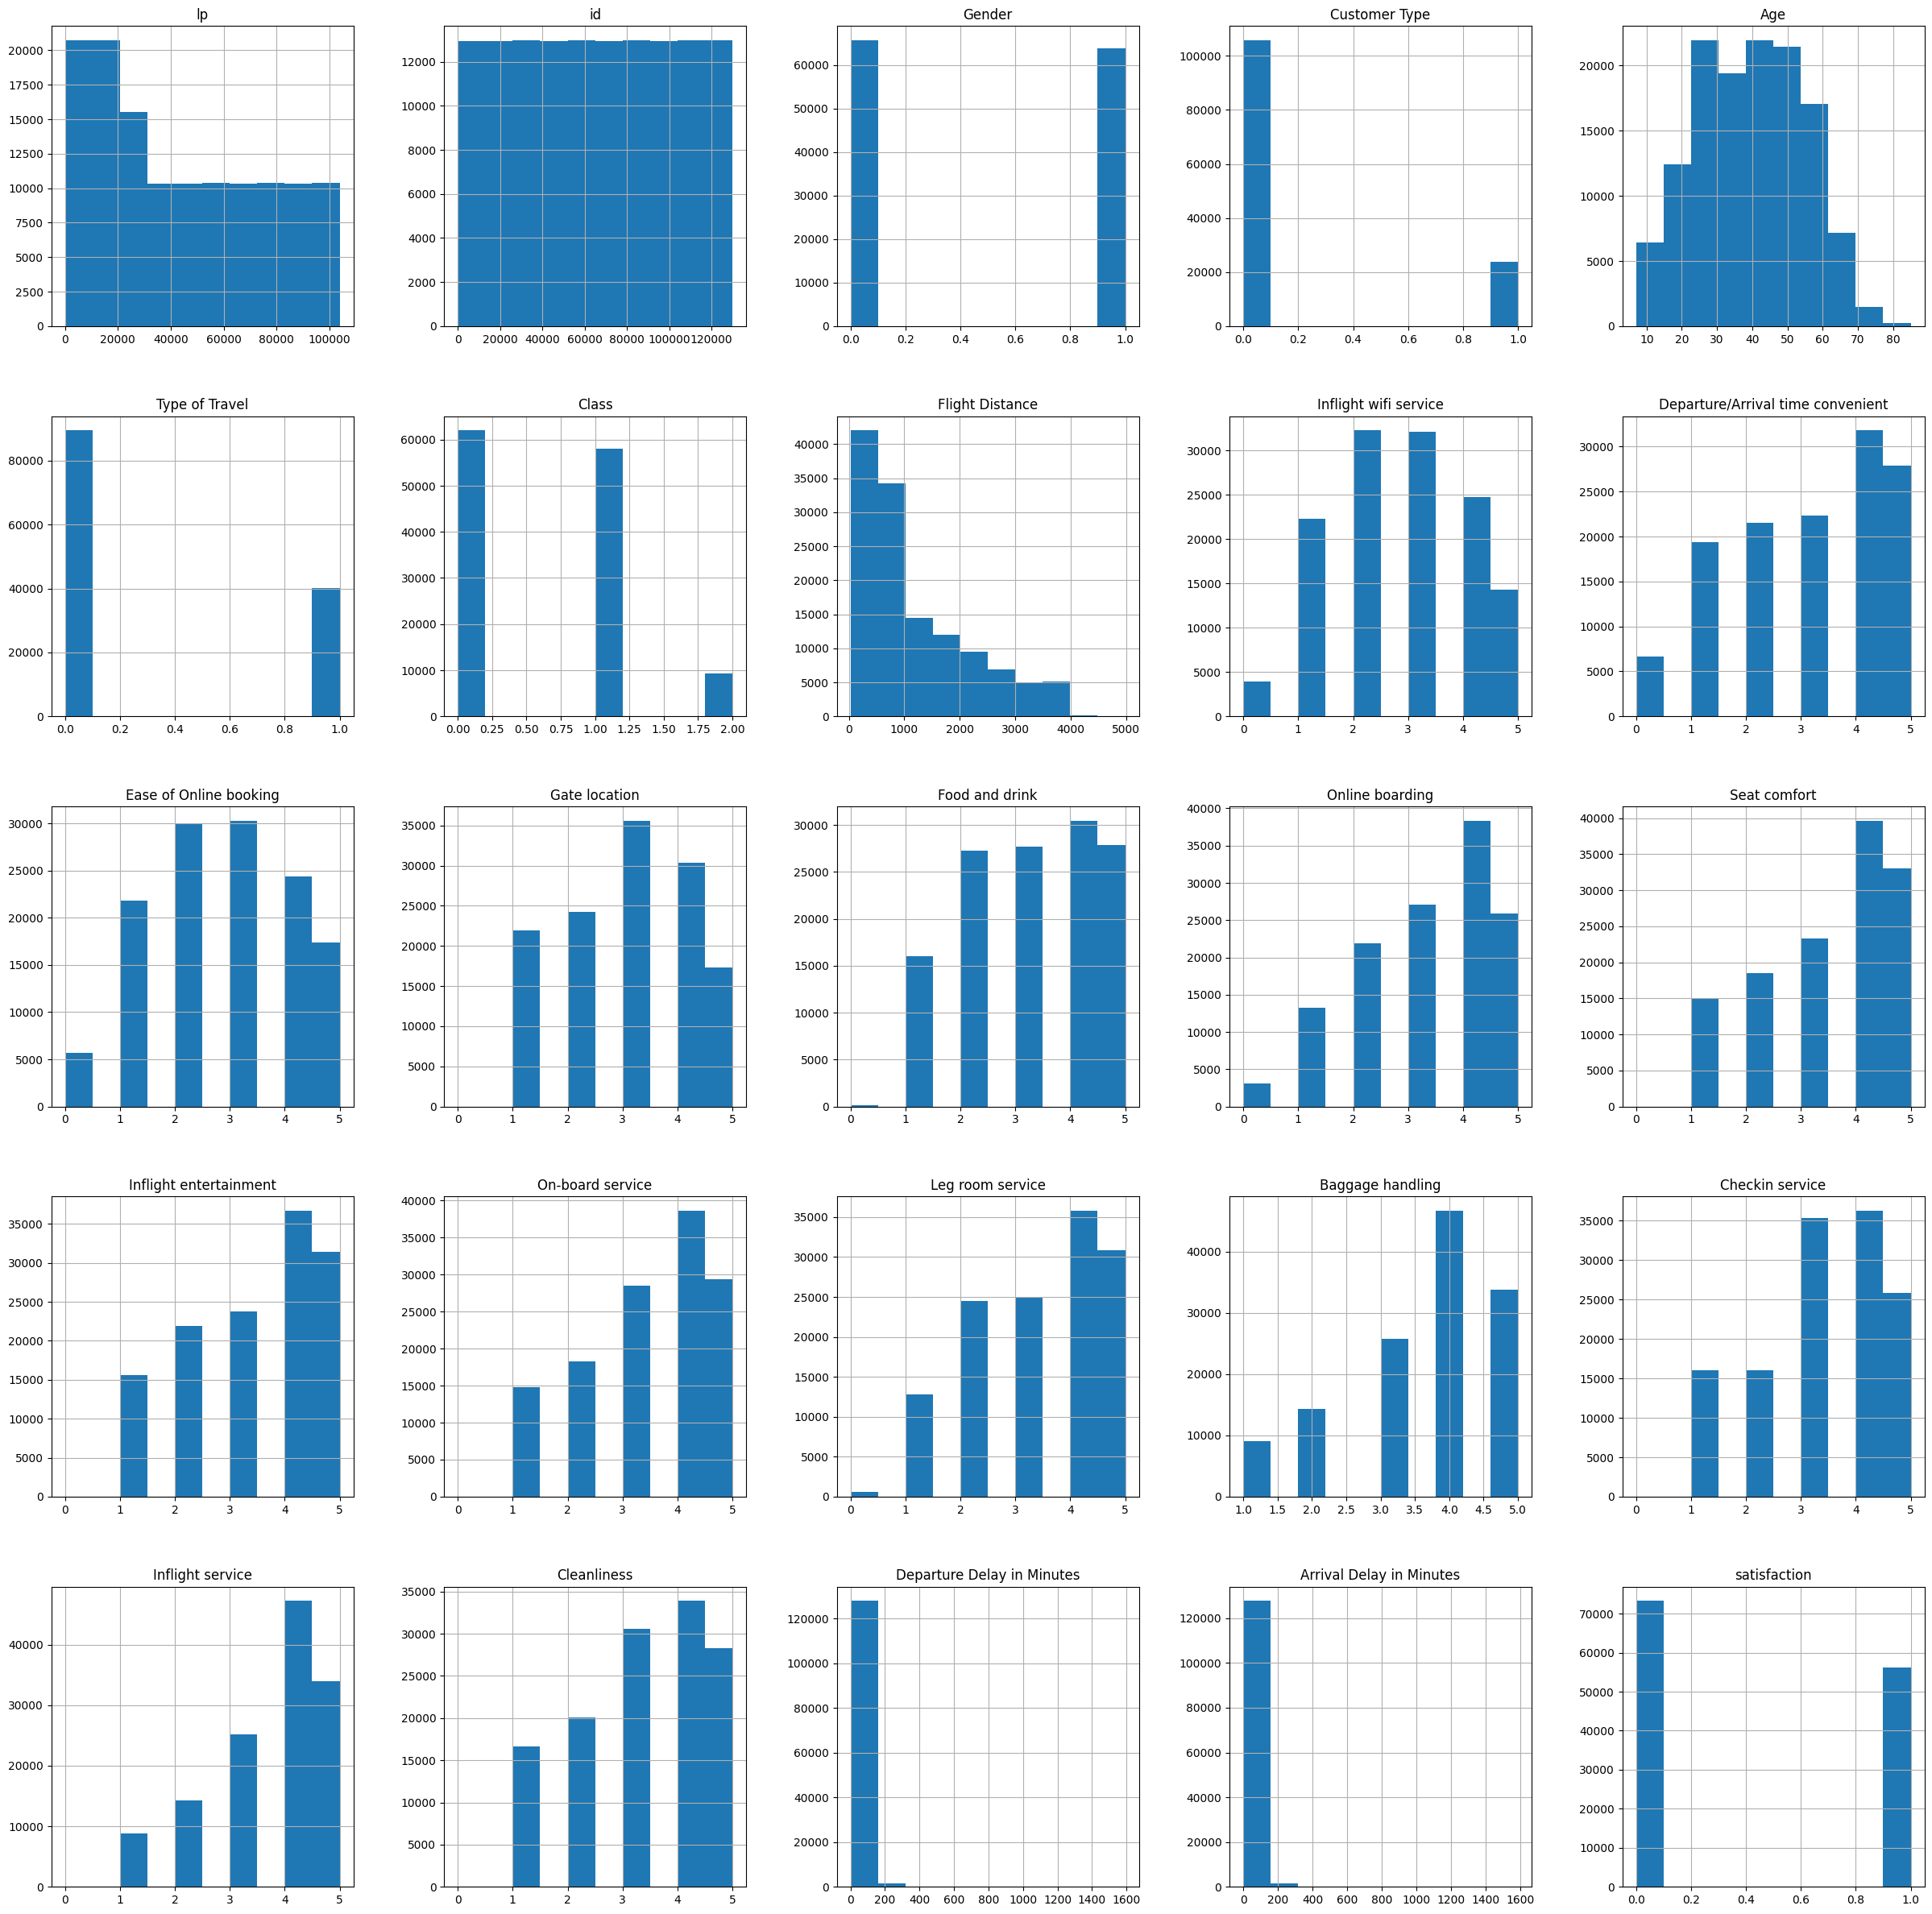

In [ ]:
data.hist(figsize = (30, 30))
plt.show()

In [ ]:
# tu można dać scatter ploty jak np ponizszy

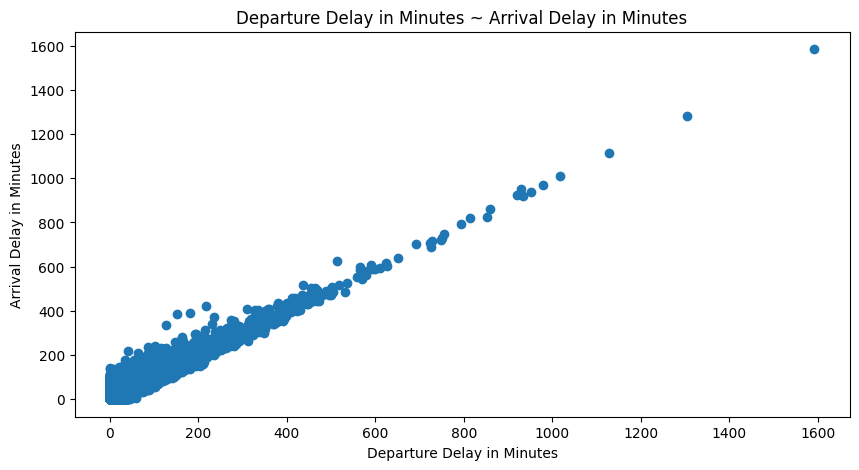

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(data['Departure Delay in Minutes'], data['Arrival Delay in Minutes'])
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Departure Delay in Minutes ~ Arrival Delay in Minutes')

plt.show()

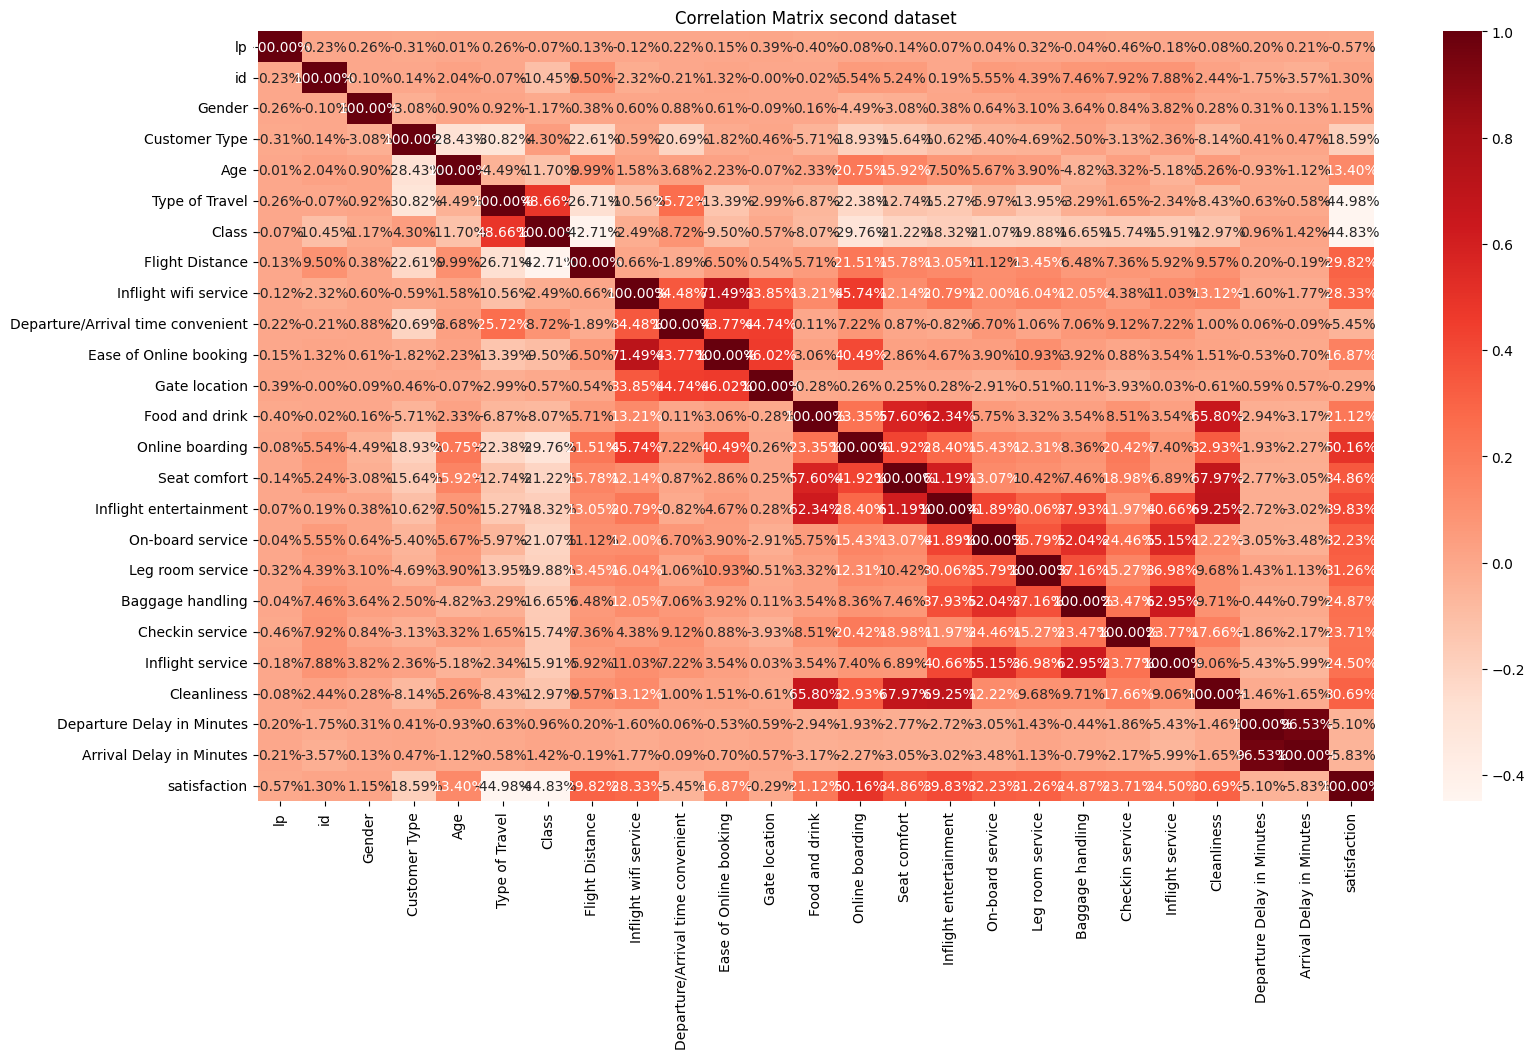

In [ ]:
# Correlation Matrix
corrmatrix = data.corr()
plt.figure(figsize = (18,10))
heatmap(corrmatrix, cmap = 'Reds', annot = True, fmt = '.2%')
plt.title('Correlation Matrix second dataset')
plt.show()

In [ ]:
## Decision tree

In [ ]:
x = data.drop('satisfaction', axis=1)
y = data.satisfaction

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model = model.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train) #accuracy on the training set

1.0

In [ ]:
model.score(x_test, y_test) #accuracy on the test set

0.9468298710325121

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
model.min_samples_split = 200
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 200,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
model = model.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train)

0.9552269063317533

In [ ]:
model.score(x_test, y_test)

0.9535485365665303

In [ ]:
y_test_pred = model.predict(x_test)

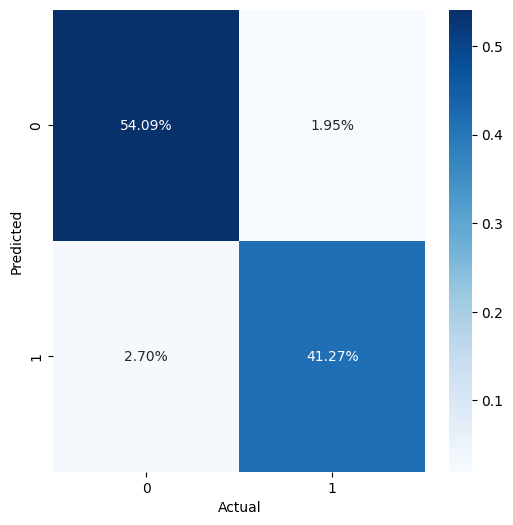

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (6, 6))


heatmap(cm/sum(sum(cm)), annot = True, fmt = '.2%', cmap = 'Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
model.feature_importances_

array([4.98429780e-04, 1.34114101e-02, 1.05263588e-04, 4.54364306e-02,
       6.88374592e-03, 1.65344694e-01, 2.00310932e-02, 1.60195618e-03,
       1.97009926e-01, 3.80552585e-05, 6.70229692e-04, 1.23518713e-02,
       7.91888746e-04, 4.13019745e-01, 9.16406490e-03, 5.10988940e-02,
       2.40817418e-03, 6.19430816e-03, 1.04279557e-02, 2.57717398e-02,
       7.43142032e-03, 7.84775964e-03, 5.25108289e-04, 1.93583611e-03])

In [ ]:
importance_table = pd.DataFrame({
    'Variable': x.columns,
    'Importance': model.feature_importances_
})

importance_table = importance_table.sort_values(by='Importance', ascending=False).reset_index(drop=True)
importance_table
# tu trzeba bedzie zinterpretowac co najmniej pierwsze 3 bo one sa znaczace

,Variable,Importance
0,Online boarding,0.413020
1,Inflight wifi service,0.197010
2,Type of Travel,0.165345
3,Inflight entertainment,0.051099
4,Customer Type,0.045436
5,Checkin service,0.025772
6,Class,0.020031
7,id,0.013411
8,Gate location,0.012352
9,Baggage handling,0.010428


<Axes: >

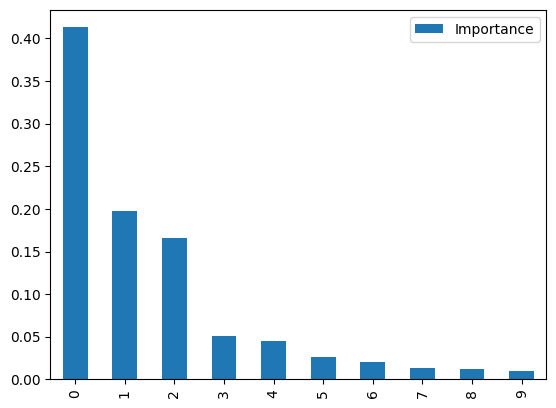

In [ ]:
importance_table.head(10).plot(kind = 'bar') # nie wiem czy chcemy taki - jesli tak, to musimy go nazwac

In [ ]:
model.classes_

array([0, 1])

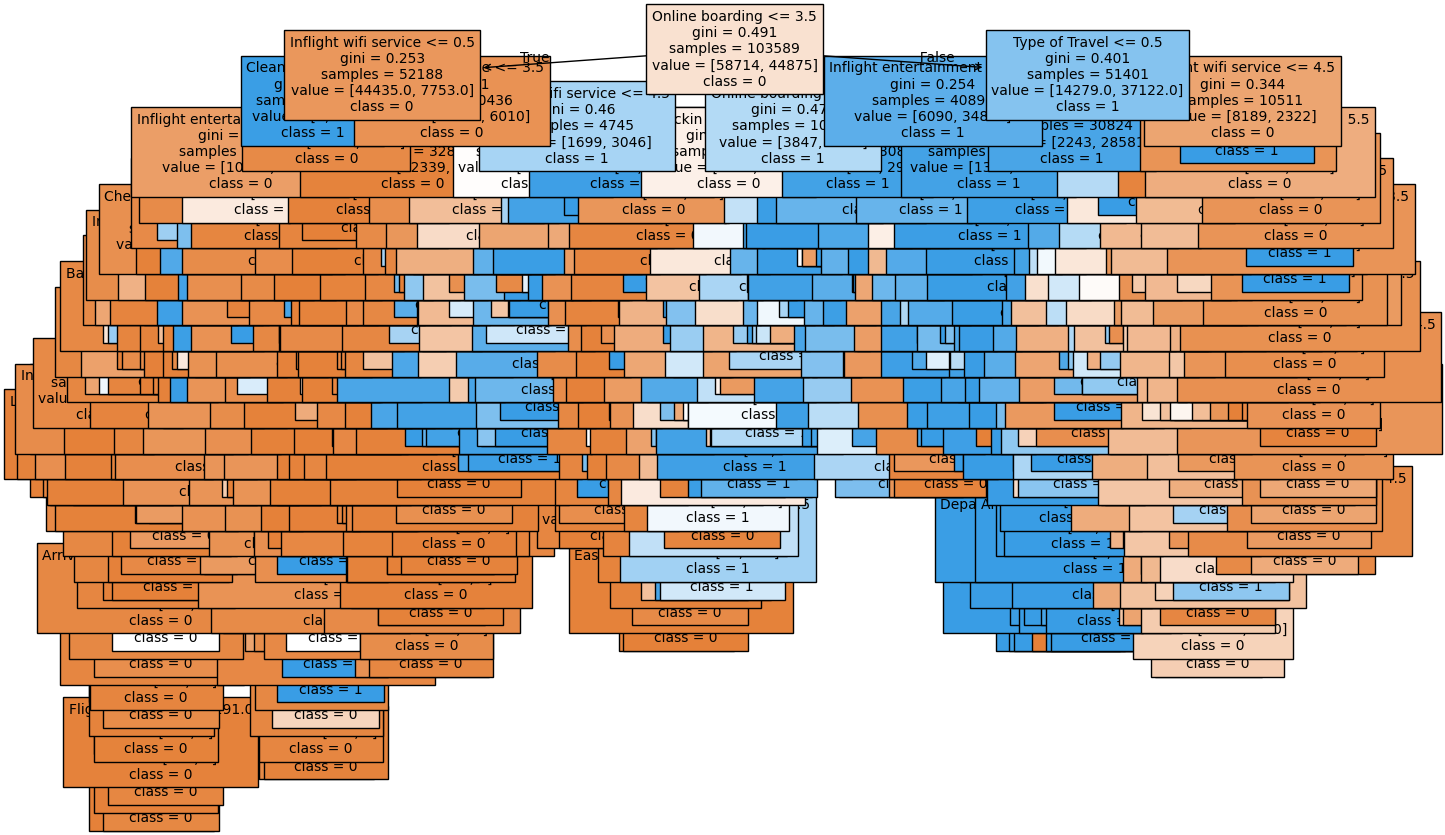

In [ ]:
fig = plt.figure(figsize=(16,10))
plot_tree(model,
          feature_names = x.columns.tolist(),
          class_names = ['0', '1'], #albo odwrotnie bo nie wiem
          filled = True,
          fontsize = 10)
plt.show()

In [ ]:
## minimal cost complexity pruning

In [ ]:
model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

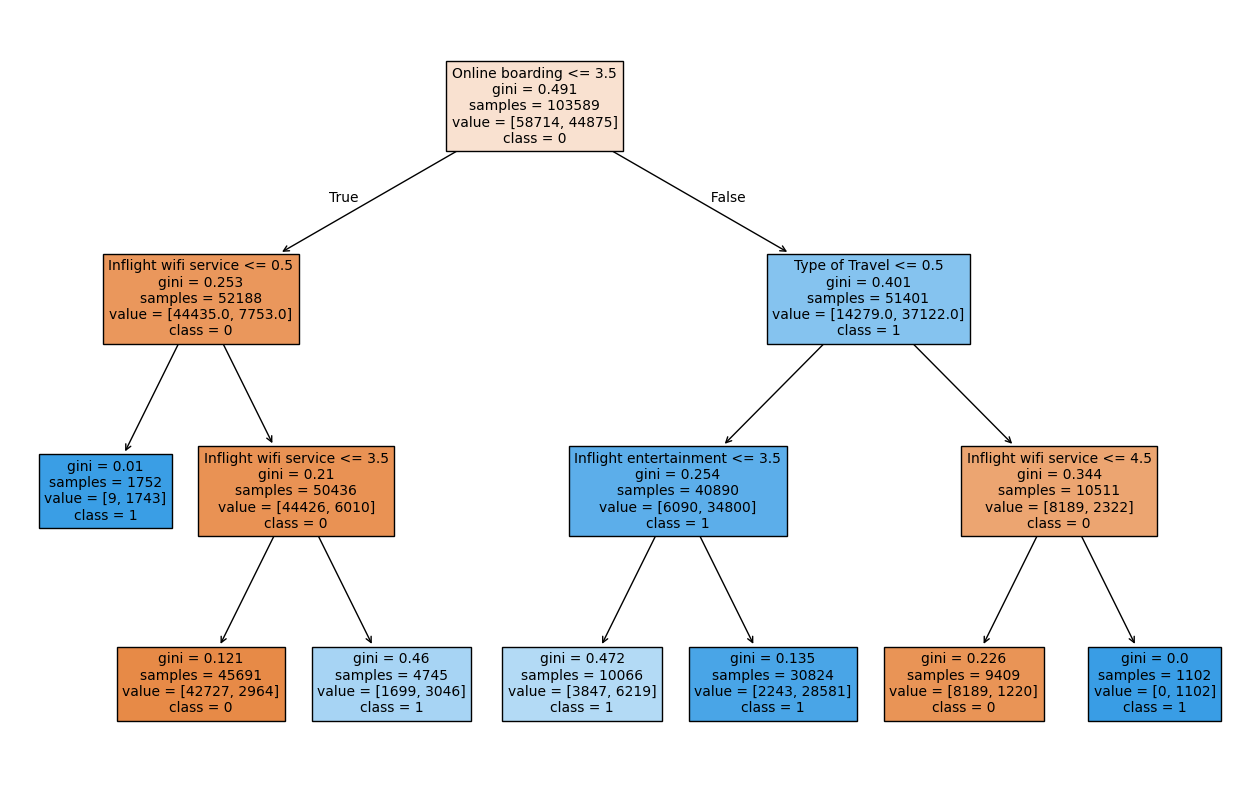

In [ ]:
model.ccp_alpha = 0.01

model.fit(x_train, y_train)

fig = plt.figure(figsize=(16,10))
plot_tree(model,
          feature_names = x.columns.tolist(),
          class_names = ['0', '1'], #albo odwrotnie bo nie wiem
          filled = True,
          fontsize = 10)
plt.show()


In [ ]:
## K-means clustering

In [ ]:
# nie mozna tego dobrze zclustrowac - scatterploty nie wychodza wystarczajaco ładne

In [ ]:
data.sort_values(by="lp",inplace = True)
data.reset_index(drop=True, inplace=True)
data

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,0,19556,0,0,52,0,1,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
2,1,90035,0,0,36,0,0,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
3,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
4,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,103899,94171,0,1,23,0,1,192,2,1,...,2,3,1,4,2,3,2,3,0.0,0
129483,103900,73097,1,0,49,0,0,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,1
129484,103901,68825,1,1,30,0,0,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,0
129485,103902,54173,0,1,22,0,1,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [ ]:
data.to_csv('data.csv', index=False)
data=data.drop('lp',axis=1)


In [ ]:
df= data.drop('Age', axis=1)

In [ ]:
# Select only numerical columns for clustering
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_columns]


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

In [ ]:
# Plot elbow curve
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal k')

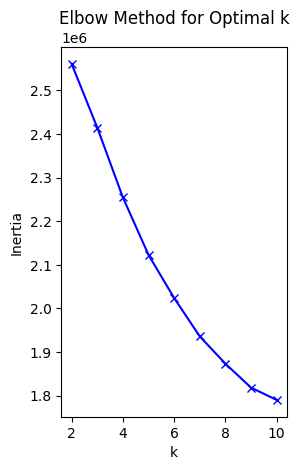

In [ ]:
# Subplot for elbow method
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

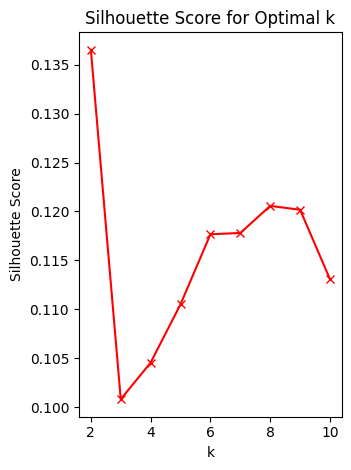

In [ ]:
# Subplot for silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

In [ ]:
# Apply K-means clustering with optimal k (let's say k=4 based on the plots)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Analyze clusters (only for numerical columns)
cluster_summary = df.groupby('Cluster')[numerical_columns].mean()
print("\nCluster Summary (Numerical Features):")
print(cluster_summary)


Cluster Summary (Numerical Features):
                   id    Gender  Customer Type  Type of Travel     Class  \
Cluster                                                                    
0        63542.869538  0.500654       0.263044        0.347012  0.765705   
1        70077.455751  0.494978       0.045261        0.001787  0.070513   
2        64470.165930  0.500000       0.143066        0.068626  0.298331   
3        63314.132732  0.472990       0.216112        0.710754  1.027073   

         Flight Distance  Inflight wifi service  \
Cluster                                           
0             987.717362               2.315287   
1            1841.472982               1.994799   
2            1446.768048               4.349123   
3             732.242088               2.458263   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                 2.902931               

In [ ]:
# Add frequency analysis for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Features Distribution in Clusters:")
for col in categorical_columns:
    print(f"\n{col} distribution in clusters:")
    print(df.groupby('Cluster')[col].value_counts().unstack())



Categorical Features Distribution in Clusters:


In [ ]:
# isualize clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

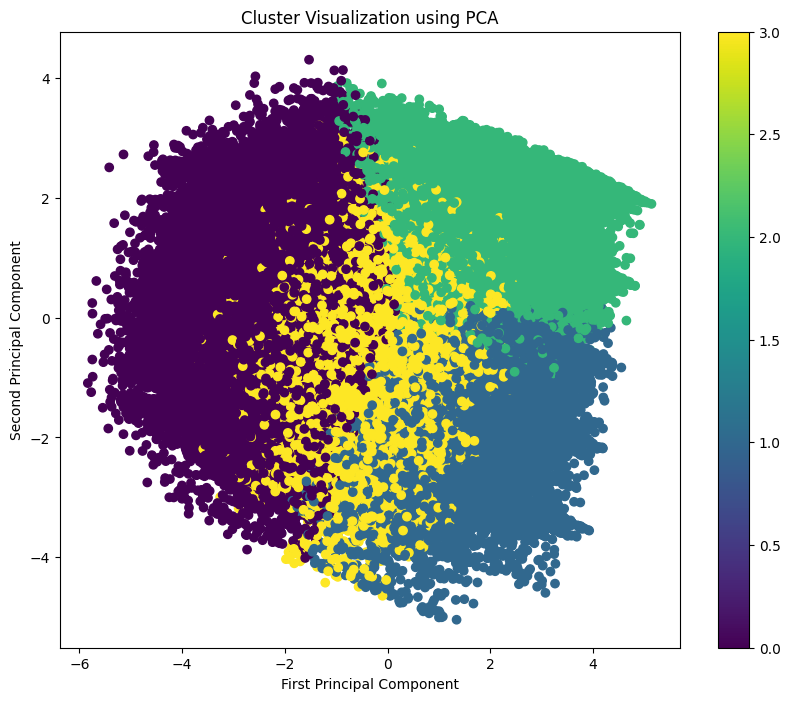

In [ ]:
# plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization using PCA')
plt.colorbar(scatter)
plt.show()


In [ ]:
feature_importance = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=numerical_columns
)
print("\nCluster Centers (Feature Importance):")
print(feature_importance)



Cluster Centers (Feature Importance):
             id    Gender  Customer Type  Type of Travel     Class  \
0  63538.826493  0.500756       0.263329        0.346585  0.765348   
1  70079.803944  0.495119       0.045711        0.001786  0.070788   
2  64471.653432  0.499964       0.143203        0.068679  0.298631   
3  63312.817213  0.472764       0.215414        0.711747  1.027800   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0       987.718283               2.315155                           2.902642   
1      1840.563685               1.995318                           1.845846   
2      1446.794960               4.348742                           4.078516   
3       732.153419               2.457155                           3.331192   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                2.612080       2.972225  ...                1.974910   
1                1.917308       1.940005  ...                4.

In [ ]:
df.to_csv('clustered_data.csv', index=False)


Results saved to 'clustered_data.csv'
